# Load pytorch libraries

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F


# Define the MNIST training and validation sets, and possible transforms to be applied.

In [2]:
from torch.utils.data import Dataset, DataLoader

class PreLoadedDataset(Dataset):
    def __init__(self,dataset,device='cuda'):
        self.shared_tensor = []
        self.shared_label = []
        for i in range(len(dataset)):
          img,label = dataset[i]
          self.shared_tensor.append(img.to(device))
          self.shared_label.append(torch.tensor(label).to(device))

    def __getitem__(self, index):
        return self.shared_tensor[index], self.shared_label[index]

    def __len__(self):
        return len(self.shared_tensor)

In [3]:
valid_ratio = 0.3
transform = transforms.Compose(
    [
     # define your data augmentation here!
    #  transforms.RandomRotation(degrees=30),
     transforms.ToTensor(),
     transforms.Normalize((0.1307,), (0.3081,))])

train_valid_dataset = torchvision.datasets.MNIST(root='./data', train=True,
                                        download=True, transform=transform)
nb_train = int((1.0 - valid_ratio) * len(train_valid_dataset))
nb_valid =  int(valid_ratio * len(train_valid_dataset))
train_dataset_tv, valid_dataset_tv = torch.utils.data.dataset.random_split(train_valid_dataset, [nb_train, nb_valid])
train_dataset = PreLoadedDataset(train_dataset_tv)
valid_dataset = PreLoadedDataset(valid_dataset_tv)

trainloader = torch.utils.data.DataLoader(train_dataset, batch_size=500,
                                          shuffle=True)
validloader = torch.utils.data.DataLoader(valid_dataset, batch_size=500,
                                          shuffle=True)

classes = ('0', '1', '2', '3',
           '4', '5', '6', '7', '8', '9')

100%|██████████| 9912422/9912422 [00:00<00:00, 111242039.93it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 90399771.51it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 34682637.83it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 16696344.23it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



# Visualize the MNIST dataset.

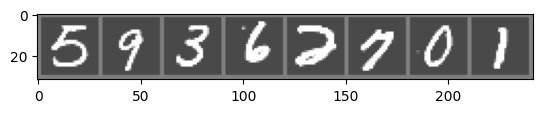

    5     9     3     6     2     7     0     1


In [6]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.cpu().numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
images, labels = next(iter(trainloader))

Nimages_to_visualize = 8
# show images
imshow(torchvision.utils.make_grid(images[:Nimages_to_visualize,]))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(Nimages_to_visualize)))

# Construct the Neural network.



In [5]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(32, 32, kernel_size=3, stride=1, padding=1)
        self.fc1 = nn.Linear(32 * 7 * 7, 512)
        self.fc2 = nn.Linear(512, 128)
        self.fc3 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(torch.sigmoid(self.conv2(x)))
        x = F.relu(self.conv3(x))
        x = x.view(-1, 32 * 7 * 7)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
net = Net()
print(sum([p.numel() for p in net.parameters()]))
net.to(device)

cuda:0
884330


Net(
  (conv1): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=1568, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=10, bias=True)
)

# Define the loss function and the optimizer.

<font color=red> YOUR CODE BELOW </font>

In [41]:
import copy
criterion = nn.CrossEntropyLoss()
# define your optimizer and its learning rate (lr) here!

optimtable = []
nettable = []
losstable = []
optimlabels = []

# SGD
net = Net().to(device)
nettable.append(copy.deepcopy(net))
optimizer = optim.SGD(nettable[0].parameters(), lr=0.07)
optimtable.append(optimizer)
optimlabels.append("SGD")

# SGD  with momentum; modify  second line below to change it from SGD and tune parameters
nettable.append(copy.deepcopy(net))
#optimizer = #YOUR CODE HERE
optimizer = optim.SGD(nettable[1].parameters(), lr=0.07,momentum = 0.6,nesterov=False)
optimtable.append(optimizer)
optimlabels.append("SGD with momentum")

# Adagrad; modify  second line below to change it from SGD and tune parameters
nettable.append(copy.deepcopy(net))
#optimizer = #YOUR CODE HERE
optimizer = optim.Adagrad(nettable[2].parameters())
optimtable.append(optimizer)
optimlabels.append("Adagrad")

# RMSprop; modify  second line below to change it from SGD and tune parameters
nettable.append(copy.deepcopy(net))
#optimizer = #YOUR CODE HERE
optimizer = optim.RMSprop(nettable[3].parameters(), lr=0.0005,momentum = 0.3)
optimtable.append(optimizer)
optimlabels.append("RMSprop")

# Adam; modify second line below to change it from SGD and tune parameters
nettable.append(copy.deepcopy(net))
#optimizer = #YOUR CODE HERE
optimizer = optim.Adam(nettable[4].parameters())
optimtable.append(optimizer)
optimlabels.append("Adam")


# Train the CNN and store the loss vs epochs in losstable

In [42]:
import time
nepochs = 10


for index in range(len(optimtable)):
  lossarray = []
  start_time = time.time()
  for epoch in range(nepochs):  # loop over the dataset multiple times

      running_loss = 0.0
      for i, data in enumerate(trainloader, 0):
          # get the inputs; data is a list of [inputs, labels]
          inputs, labels = data[0].to(device), data[1].to(device)

          # zero the parameter gradients
          optimtable[index].zero_grad()

          # forward + backward + optimize
          outputs = nettable[index](inputs)
          loss = criterion(outputs, labels)
          loss.backward()
          optimtable[index].step()

          # print statistics
          running_loss += loss.item()
      epoch_loss = running_loss / (i+1)
      lossarray.append(epoch_loss)
      print("Epoch: ", epoch, " train loss: ", '%.3f' % epoch_loss)
  losstable.append(lossarray)
  time_elap = (time.time() - start_time) // 60
  print('Finished Training in %d mins' % time_elap)

Epoch:  0  train loss:  2.298
Epoch:  1  train loss:  2.276
Epoch:  2  train loss:  1.883
Epoch:  3  train loss:  0.821
Epoch:  4  train loss:  0.474
Epoch:  5  train loss:  0.346
Epoch:  6  train loss:  0.285
Epoch:  7  train loss:  0.244
Epoch:  8  train loss:  0.212
Epoch:  9  train loss:  0.191
Finished Training in 0 mins
Epoch:  0  train loss:  2.279
Epoch:  1  train loss:  1.459
Epoch:  2  train loss:  0.363
Epoch:  3  train loss:  0.230
Epoch:  4  train loss:  0.178
Epoch:  5  train loss:  0.146
Epoch:  6  train loss:  0.123
Epoch:  7  train loss:  0.105
Epoch:  8  train loss:  0.092
Epoch:  9  train loss:  0.081
Finished Training in 0 mins
Epoch:  0  train loss:  1.693
Epoch:  1  train loss:  0.369
Epoch:  2  train loss:  0.194
Epoch:  3  train loss:  0.140
Epoch:  4  train loss:  0.117
Epoch:  5  train loss:  0.099
Epoch:  6  train loss:  0.090
Epoch:  7  train loss:  0.082
Epoch:  8  train loss:  0.075
Epoch:  9  train loss:  0.070
Finished Training in 0 mins
Epoch:  0  train

 Plot the results

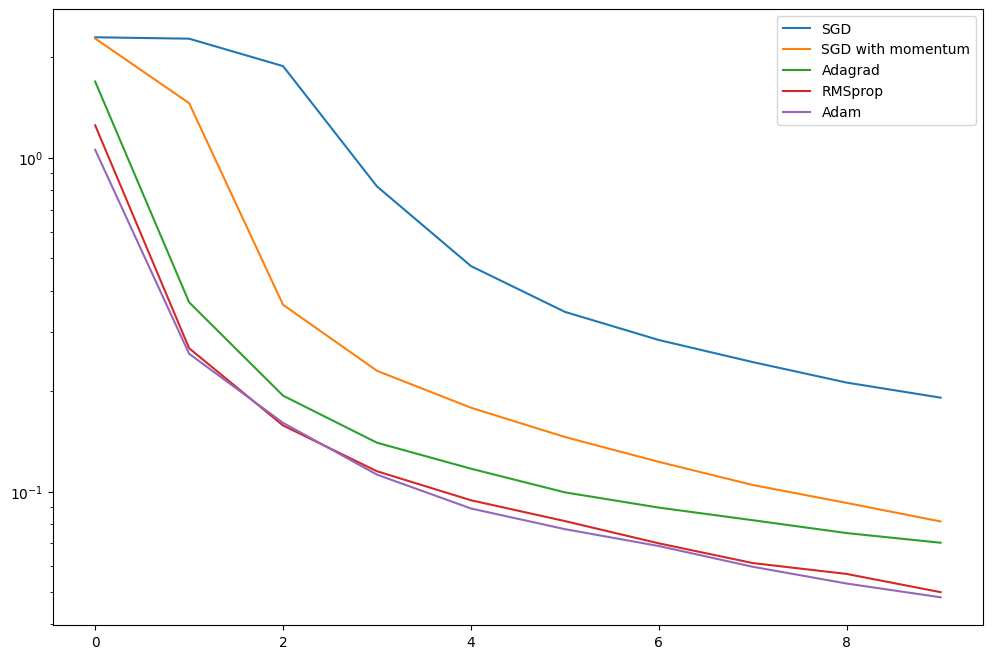

In [43]:
fig,ax = plt.subplots(figsize=(12,8))
for i in range(len(losstable)):
  ax.plot(losstable[i],label=optimlabels[i])
ax.legend()
plt.yscale("log")